# Task 1.1 Data Understanding
*Alberto Roberto Marinelli, Giacomo Cignoni, Alessandro Bucci*
## Importing Libraries
First we import the libraries necessary to analyze the data

In [207]:
import math
import sys
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [208]:
pd.set_option('mode.use_inf_as_na', True)

def mr_bins(number_of_samples):
    return (np.log2(number_of_samples)).astype(np.int64) + 1


Then we load the datasets

In [209]:
df_tweets = pd.read_csv('../dataset/tweets.csv', sep=',', index_col=0)  # load tweets
df_users = pd.read_csv('../dataset/users.csv', sep=',', index_col=0)  # load users

In [210]:
df_users.info()
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 2353593986 to 933183398
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            11507 non-null  object 
 1   lang            11508 non-null  object 
 2   bot             11508 non-null  int64  
 3   created_at      11508 non-null  object 
 4   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 539.4+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 136647 entries, 528578456452612097 to 520574848935153664
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_id         134464 non-null  object
 1   retweet_count   132232 non-null  object
 2   reply_count     130163 non-null  object
 3   favorite_count  130128 non-null  object
 4   num_hashtags    126020 non-null  object
 5   num_urls        130145 non-null  object
 6   n

In [211]:
df_tweets.index.unique()

Index(['528578456452612097', '492852780101406721',    '888885286917605',
       '516101108960206848', '528187250392461312', '570832754230697984',
       '513989622138171392', '528228030565867520', '593418231051759618',
       '571343376034844672',
       ...
       '486865957533388800', '484685296236498944', '468829855912824832',
       '528268412032942080', '291215078842618705', '500184073814700033',
       '578072909085724672', '588013533557841920', '591597103090020352',
       '520574848935153664'],
      dtype='object', name='id', length=136445)

In [212]:
df_users.reset_index(inplace=True)
df_tweets.reset_index(inplace=True)

In [213]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11508 non-null  int64  
 1   name            11507 non-null  object 
 2   lang            11508 non-null  object 
 3   bot             11508 non-null  int64  
 4   created_at      11508 non-null  object 
 5   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 539.6+ KB


In [214]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136647 entries, 0 to 136646
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              136646 non-null  object
 1   user_id         134464 non-null  object
 2   retweet_count   132232 non-null  object
 3   reply_count     130163 non-null  object
 4   favorite_count  130128 non-null  object
 5   num_hashtags    126020 non-null  object
 6   num_urls        130145 non-null  object
 7   num_mentions    128069 non-null  object
 8   created_at      136647 non-null  object
 9   text            131286 non-null  object
dtypes: object(10)
memory usage: 10.4+ MB


In [215]:
df_tweets

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
0,528578456452612097,567430901,0,0,0,0,0,0,2019-11-03 16:04:59,"La sera, a letto.Lui:- FarÃ² di te la donna pi..."
1,492852780101406721,277506943,0,0,2,1,0,0,2019-07-28 02:03:54,#RFGoNaked http://t.co/eaf1sO4TWL
2,888885286917605,317296274,0,dcl83oci,NaN,NaN,NaN,NaN,2020-03-21 17:43:22,Volunteers report 100% retail tobacco complian...
3,516101108960206848,1372026204,0,0,0,4,1,0,2019-09-30 05:44:27,What HR Lessons Did I Learn Whilst Managing Me...
4,528187250392461312,468101494,0,0,0,0,0,0,2019-11-02 14:10:28,"-Cara, ti voglio POSSEDERE dove non te ti ha m..."
...,...,...,...,...,...,...,...,...,...,...
136642,500184073814700033,576148031,0,0,0,0,0,0,2019-08-17 07:35:50,"Porta bene Renzi! Grazie ""presidente"""
136643,578072909085724672,25693756,0,0,0,0,0,1,2020-03-19 05:58:16,@malakhstudios You OK?
136644,588013533557841920,2395918790,0,0,0,0,0,0,2020-04-15 16:18:45,"If there is Jacob Whiteside, there is also Jac..."
136645,591597103090020352,2290983830,8,0,0,0,0,1,2020-04-25 13:38:35,RT @Katie_Edwards_: RT if you like watermelon!...


## Features informations
"Type" indicates the wanted feature Datatype for conversion in "Casting" section

### Users dataset
id, name, lang, bot, created_at and statuses_count
* **id** (*Numerical*)
  * Type: **Int64**
  * Description: Is the identifier of the single user, it will be used to join the datasets, so it is necessary that this data is a non-null integer.
* **name** (*Categorical*)
  * Type: **String**
  * Description: The name of the user.
* **lang** (*Categorical*)
  * Type: **String**
  * Description: The user’s language selected
* **bot** (*Numerical*)
  * Type: **Categorical**
  * Description: A binary variable that indicates if a user is a bot or a genuine user
* **created_at** (*Numerical*)
  * Type: **Datetime64**
  * Description: The timestamp of when the user was created
* **statuses_count** (*Numerical*)
  * Type: **Int64**
  * Description: The count of the tweets made by the user at the moment of data crawling.
### Tweets dataset
* **id** (*Numerical*)
  * Type: **Object**
  * Description: Is the identifier of the single tweet, it should be int64, but we decided to consder it object because it does not affect the data if it is not an integer.
* **user_id** (*Numerical*)
  * Type: **Int64**
  * Description: Is the identifier of the single user, it will be used to join the datasets, so it is necessary that this data is a non-null integer
* **retweet_count** (*Numerical*)
  * Type: **Int64**
  * Description: The number of retweets of the single tweet
* **reply_count** (*Numerical*)
  * Type: **Int64**
  * Description: The number of replies of the single tweet
* **favorite_count** (*Numerical*)
  * Type: **Int64**
  * Description: The number of favorites (or likes) of the single tweet
* **num_hashtags** (*Numerical*)
  * Type: **Int64**
  * Description: The number of hashtags in the single tweet
* **num_urls** (*Numerical*)
  * Type: **Int64**
  * Description: The number of urls in the single tweet
* **num_mentions** (*Numerical*)
  * Type: **Int64**
  * Description: The number of mentions in the single tweet
* **created_at** (*Numerical*)
  * Type: **Datetime64**
  * Description: The timestamp of when the single tweet was created
* **text** (*Categorical*)
  * Type: **String**
  * Description: The text of the single tweet

## Datatype Casting
### Users dataframe casting

In [216]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11508 non-null  int64  
 1   name            11507 non-null  object 
 2   lang            11508 non-null  object 
 3   bot             11508 non-null  int64  
 4   created_at      11508 non-null  object 
 5   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 539.6+ KB


Cast name and lang columns to string and created_at to DateTime in df_users

In [217]:
df_users.id = df_users.id.astype('Int64')
df_users.name = df_users.name.astype('string')
df_users.lang = df_users.lang.astype('string')

Cast statuses_count to Int64 and created_at to DateTime in df_users

In [218]:
df_users.statuses_count = df_users.statuses_count.astype('Int64', errors='raise')
df_users.created_at = pd.to_datetime(df_users.created_at, errors='coerce')

In [219]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              11508 non-null  Int64         
 1   name            11507 non-null  string        
 2   lang            11508 non-null  string        
 3   bot             11508 non-null  int64         
 4   created_at      11508 non-null  datetime64[ns]
 5   statuses_count  11109 non-null  Int64         
dtypes: Int64(2), datetime64[ns](1), int64(1), string(2)
memory usage: 562.0 KB


### Tweets dataframe casting

In [220]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136647 entries, 0 to 136646
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              136646 non-null  object
 1   user_id         134464 non-null  object
 2   retweet_count   132232 non-null  object
 3   reply_count     130163 non-null  object
 4   favorite_count  130128 non-null  object
 5   num_hashtags    126020 non-null  object
 6   num_urls        130145 non-null  object
 7   num_mentions    128069 non-null  object
 8   created_at      136647 non-null  object
 9   text            131286 non-null  object
dtypes: object(10)
memory usage: 10.4+ MB


Cast id to int64 for memory optimization

In [221]:
df_tweets.id = pd.to_numeric(
    df_tweets.id, downcast= 'integer', errors='coerce').astype('Int64', errors='raise')


Int64 casting for numeric columns in df_tweets

In [222]:
def cast_int(x):
    try:
        return np.int64(x)
    except:
        return pd.NA
    

for col_name in df_tweets.iloc[:, : 8]:
    # Substitute values outside of Int64 limits with NaN
    df_tweets[col_name] = df_tweets[col_name].apply(cast_int)

    # Cast to Int64
    df_tweets[col_name] = df_tweets[col_name].astype('Int64', errors='raise')



Cast text column to string and created_at to DateTime in df_tweets

In [223]:
df_tweets.text = df_tweets.text.astype('string')
df_tweets.created_at = pd.to_datetime(
    df_tweets.created_at, errors='coerce') #The invalid dates are set to NaT

In [224]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136647 entries, 0 to 136646
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              132306 non-null  Int64         
 1   user_id         132271 non-null  Int64         
 2   retweet_count   130362 non-null  Int64         
 3   reply_count     117956 non-null  Int64         
 4   favorite_count  117960 non-null  Int64         
 5   num_hashtags    117958 non-null  Int64         
 6   num_urls        117960 non-null  Int64         
 7   num_mentions    126736 non-null  Int64         
 8   created_at      136647 non-null  datetime64[ns]
 9   text            131286 non-null  string        
dtypes: Int64(8), datetime64[ns](1), string(1)
memory usage: 11.5 MB


## Attributes exploration and outliers fixing

We now explore the distributions in order to find the outliers of each attribute.

### User dataset attributes exploration and outliers fixing

Explore **'bot'** attirbute distribution

1    6116
0    5392
Name: bot, dtype: int64


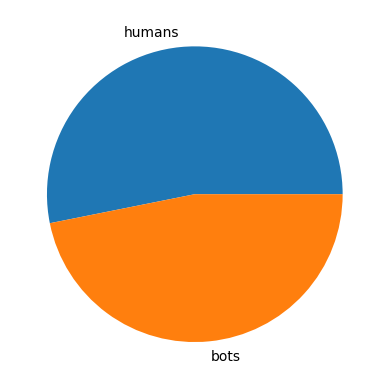

In [225]:
label= ['humans', 'bots']
print(df_users.bot.value_counts())
plt.pie(df_users.bot.value_counts(), labels=label)
plt.show()

We check **'created_at'** whit a bar plot by year.

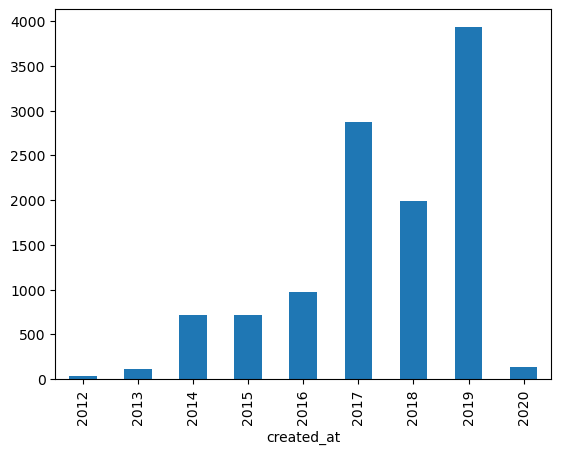

In [226]:
df_users.created_at.groupby(df_users.created_at.dt.year).count().plot(kind='bar')
plt.show()

Since Twitter was founded in 2006 and the oldest user is from 2012, there are no lower bound outliers.

Since the crawling was done in 2020, and there are no users created later than 2020, there are no upper bound outliers.

Now we check **'lang'**.

Showing how 'lang' is composed with a logarithmic scale bar plot

Langs in the user dataset:


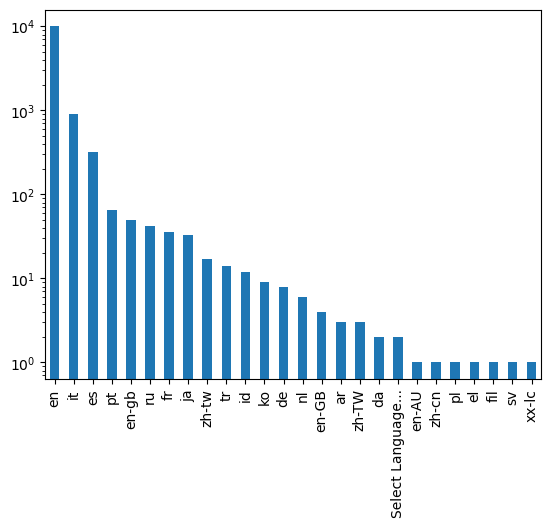

In [227]:
lang_distribution = df_users.lang.value_counts()
print('Langs in the user dataset:')
#print(lang_distribution)

lang_distribution.plot(kind="bar")
plt.yscale('log')
plt.show()

We decided that if the lang contains a dash, we'll take into consideration only the lang before it.

E.g.: "en-gb" will become "en", "zh-tw" will become "zh".

In [228]:
import re

def lang_correction(lang_string):
    lang = lang_string
    lang = re.sub('-.*$', '', lang)

    return lang

df_users.lang = df_users.lang.apply(lang_correction).astype('string')


The two only invalid values are "Select Language..." and "xx". We can manage them directly

Substituting "Select Language..." with the mode. 

In [229]:
df_users.lang.replace(to_replace="Select Language...",value=df_users.lang.mode()[0], inplace=True)

We looked at the tweets with the user id equal to the one who has 'lang' equal to xx, and determined that theier posts were english, so we changed 'lang' to 'en', which is also the mode.

In [230]:
df_users.lang.replace(to_replace="xx",value=df_users.lang.mode()[0], inplace=True)

Now we show the cleaned 'lang' distribution.

Langs in the user dataset:


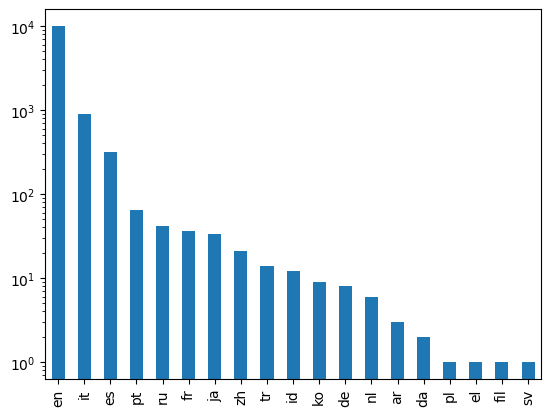

In [231]:
lang_distribution = df_users.lang.value_counts()
print('Langs in the user dataset:')
lang_distribution.plot(kind="bar")
plt.yscale('log')
plt.show()

Now we check **"statuses_count"**

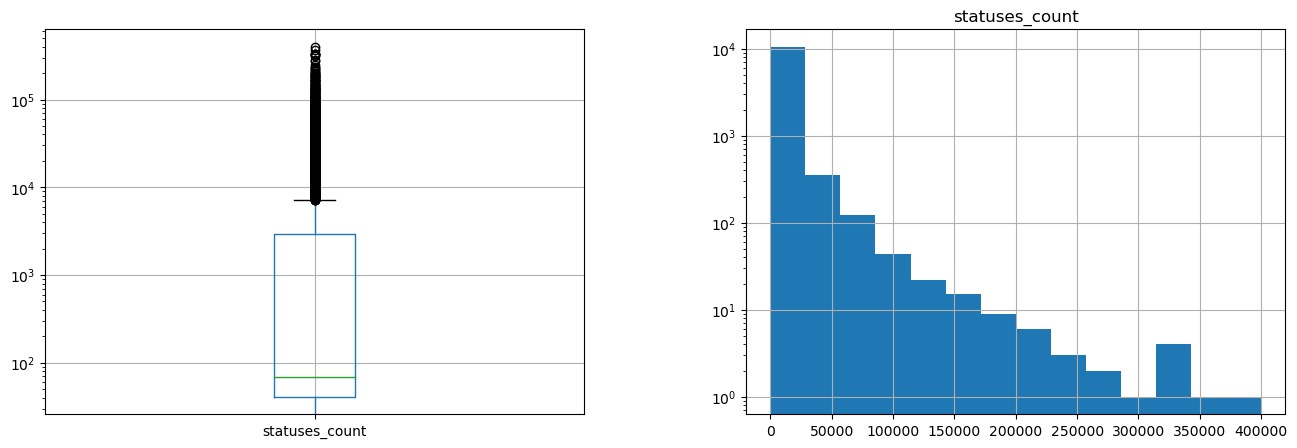

In [232]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
df_users.boxplot(column="statuses_count", ax=ax1)
ax1.set_yscale('log')
df_users.hist(column="statuses_count", ax=ax2, stacked=True, bins=mr_bins(df_users.statuses_count.count()))
ax2.set_yscale('log')
fig.subplots_adjust(wspace=0.3)
plt.show()


There are no outliers, because there is no user that violate limit of 5 * 10^7 tweets and also there are not negative values that would be invalid.

### Tweets dataset attributes exploration and outliers fixing

We check **"retweet_count"** attribute

The most retweet tweet ever has more than 4*10^6 retweets, so we not consider a retweet count over that threshold (we set them to NaN)

In [233]:
max_retweets = 4*(10**6)
df_tweets.retweet_count = df_tweets.retweet_count.apply(
    lambda x: x if not pd.isna(x) and x < max_retweets and x >= 0 else pd.NA)
df_tweets.retweet_count = df_tweets.retweet_count.astype("Int64")


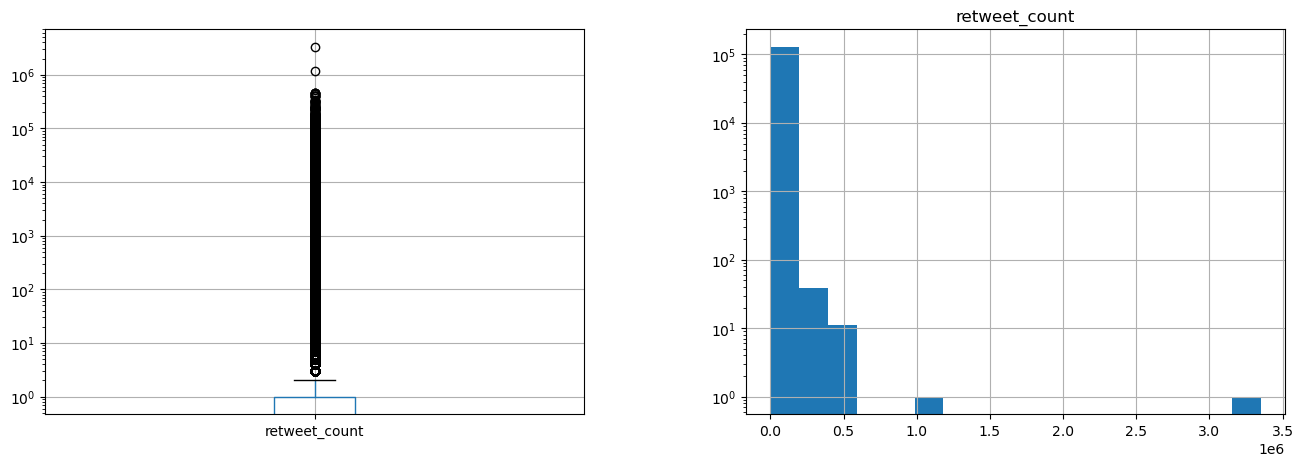

In [234]:

# Then we display the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
df_tweets.boxplot(column="retweet_count", ax=ax1)
ax1.set_yscale('log')
df_tweets.hist(column="retweet_count", ax=ax2, stacked=True, bins=mr_bins(
    df_tweets.retweet_count.count()))
ax2.set_yscale('log')
fig.subplots_adjust(wspace=0.3)
plt.show()

Now we check **'reply_count'** attribute.

The most replied tweet can't be much more replies than the highest number of replies, so we limit also the number of replies to 4*10^6

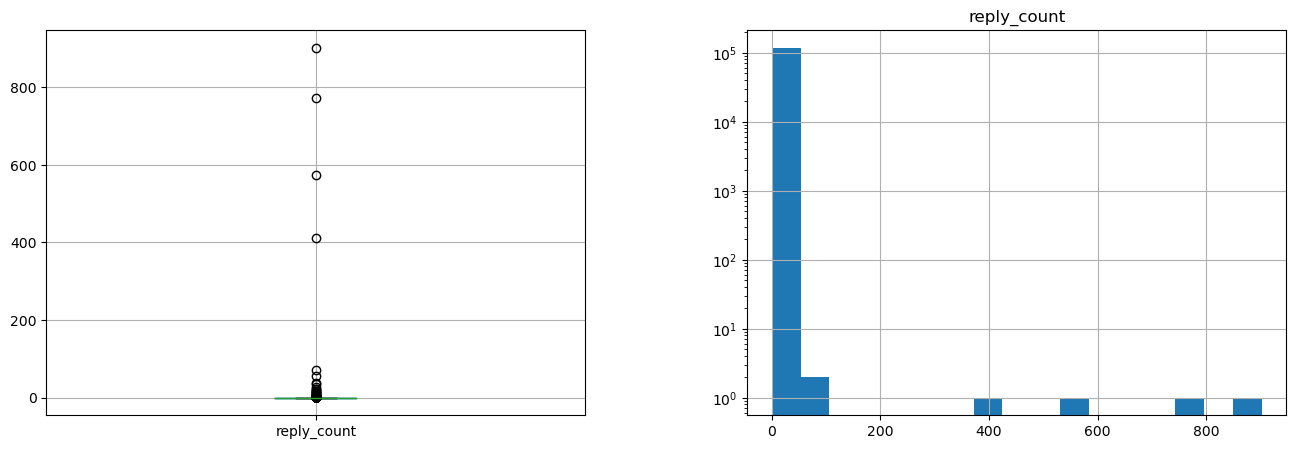

In [235]:
max_replies = 4*(10**6)
df_tweets.reply_count = df_tweets.reply_count.apply(
    lambda x: x if not pd.isna(x) and x < max_replies and x >= 0 else pd.NA)
df_tweets.reply_count = df_tweets.reply_count.astype("Int64")

# Then we display the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
df_tweets.boxplot(column="reply_count", ax=ax1)
#ax1.set_yscale('log')
df_tweets.hist(column="reply_count", ax=ax2, stacked=True, bins=mr_bins(
    df_tweets.reply_count.count()))
ax2.set_yscale('log')
fig.subplots_adjust(wspace=0.3)
plt.show()

Now we check **'favorite_count'** attribute

The most liked tweets has 7*10^6 likes, so we should limit the number of likes to that threshold

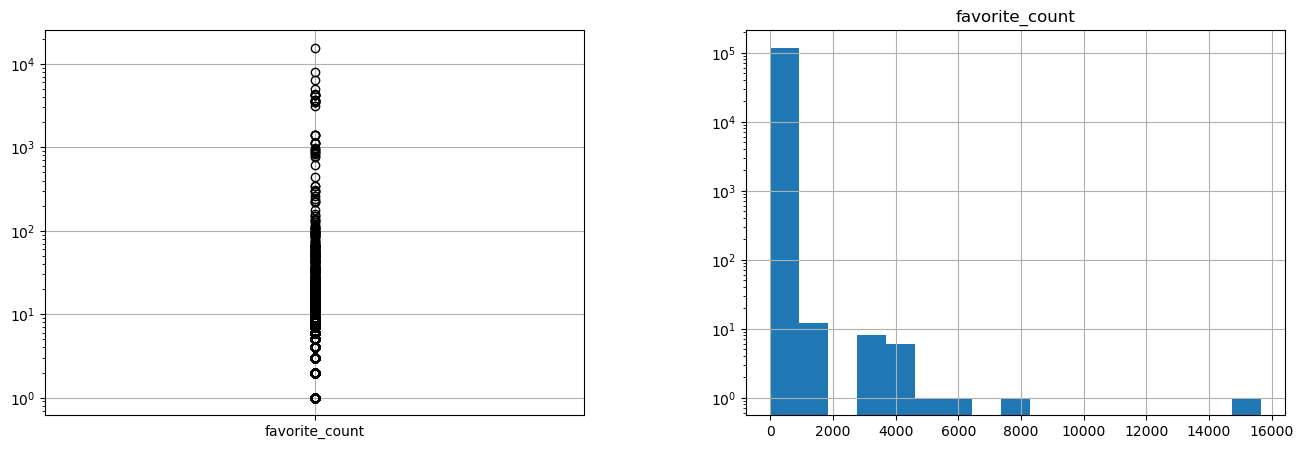

In [236]:
max_likes = 7*(10**6)
df_tweets.favorite_count = df_tweets.favorite_count.apply(
    lambda x: x if not pd.isna(x) and x < max_likes and x >= 0 else pd.NA)
df_tweets.favorite_count = df_tweets.favorite_count.astype("Int64")

# Then we display the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
df_tweets.boxplot(column="favorite_count", ax=ax1)
ax1.set_yscale('log')
df_tweets.hist(column="favorite_count", ax=ax2, stacked=True, bins=mr_bins(
    df_tweets.favorite_count.count()))
ax2.set_yscale('log')
fig.subplots_adjust(wspace=0.3)
plt.show()

**'num_hashtags'**, since the max char in a tweet is 280, we decided to replace with the median number of hashtags everything that is above that threshold

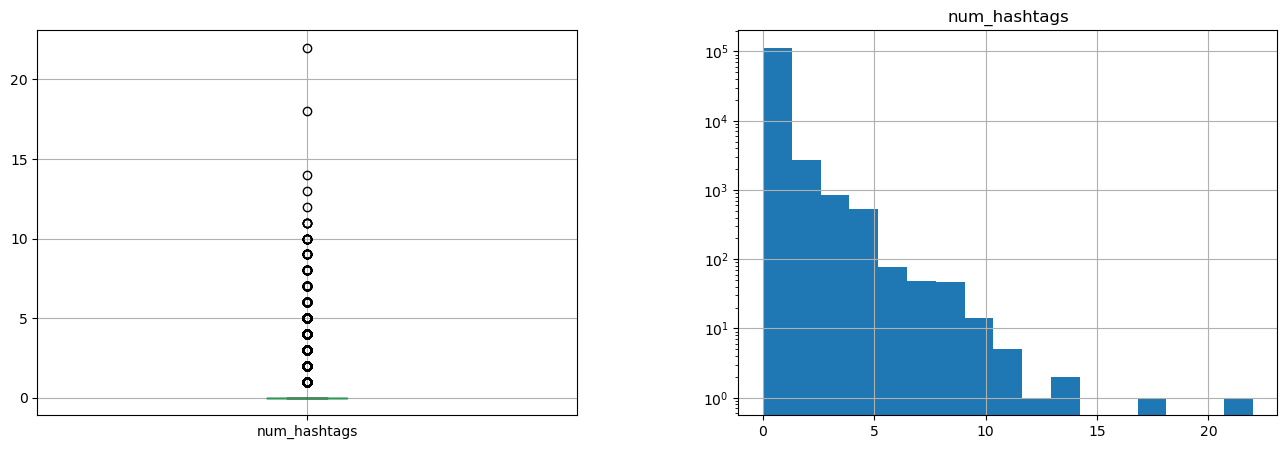

In [237]:
max_num_hashtags = 280
df_tweets.num_hashtags = df_tweets.num_hashtags.apply(
    lambda x: x if not pd.isna(x) and x < max_num_hashtags else pd.NA)
df_tweets.num_hashtags = df_tweets.num_hashtags.astype("Int64")

# Then we display the boxplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
df_tweets.boxplot(column="num_hashtags", ax=ax1)
#ax1.set_yscale('log')
df_tweets.hist(column="num_hashtags", ax=ax2, stacked=True, bins=mr_bins(
    df_tweets.num_hashtags.count()))
ax2.set_yscale('log')
fig.subplots_adjust(wspace=0.3)
plt.show()

**'num_mentions'** since the max char in a tweet is 280, and since a mention to a user needs a @ before the user's nickname (which could be just a letter) we decided to replace with the median number of hashtags everything that is above 280/2.

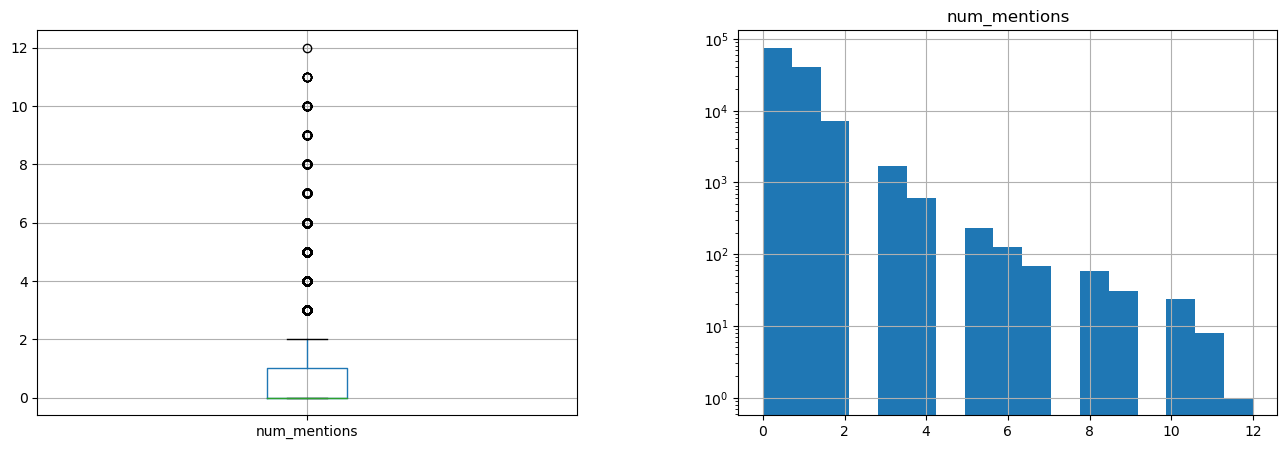

In [238]:
max_num_mentions = 140
df_tweets.num_mentions = df_tweets.num_mentions.apply(
    lambda x: x if not pd.isna(x) and x < max_num_mentions and x >= 0 else pd.NA)
df_tweets.num_mentions = df_tweets.num_mentions.astype("Int64")

# Then we display the boxplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
df_tweets.boxplot(column="num_mentions", ax=ax1)
#ax1.set_yscale('log')
df_tweets.hist(column="num_mentions", ax=ax2, stacked=True, bins=mr_bins(
    df_tweets.num_mentions.count()))
ax2.set_yscale('log')
fig.subplots_adjust(wspace=0.3)
plt.show()

'created_at' since Twitter was founded in 2006 and we are in 2022, when we will analyze the years we will consider only the ones between 2006 and 2020

## Preliminary cleaning

Drop tweets where user_id is NaN. Tweets that clearly cannot be associated to any user do not contain useful info for further steps.

In [239]:
df_tweets.dropna(subset=['user_id'], how='any', inplace=True)

Drop name column in user Dataframe. It is not useful information to our purpuse.

In [240]:
df_users.drop(columns=['name'], inplace=True)

## Manage duplicates

Before we manage the duplicates, we firsly view the heatmap of users and tweets:

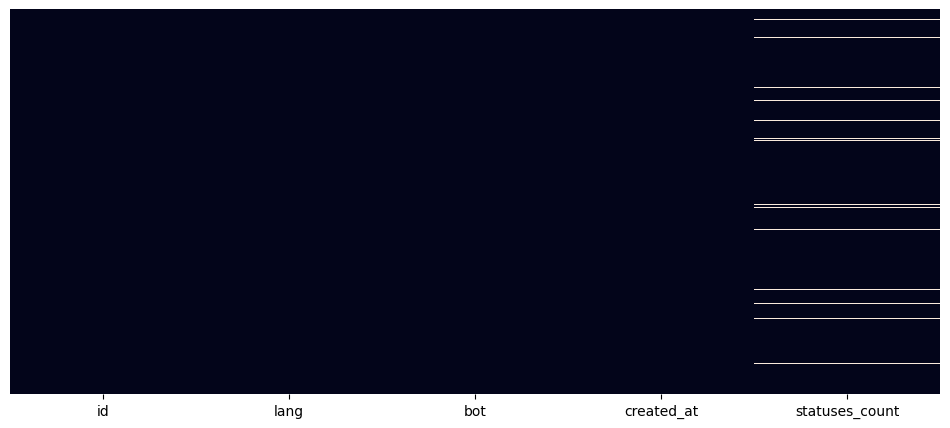

In [241]:
fig, ax = plt.subplots(figsize=(12,5)) 
sn.heatmap(df_users.isnull(), cbar=False, xticklabels=True, ax=ax, yticklabels=False)
plt.show()

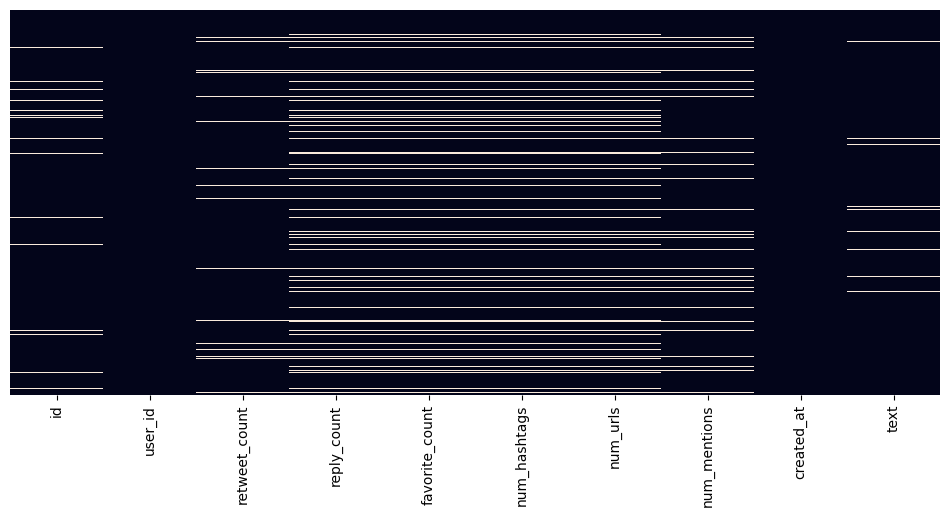

In [242]:
fig, ax = plt.subplots(figsize=(12,5)) 
sn.heatmap(df_tweets.isnull(), cbar=False, xticklabels=True, ax=ax, yticklabels=False)
plt.show()

### User Dataframe
Drop full row duplicates

In [243]:
df_users.drop_duplicates(inplace=True)

See if there are duplicate users with different NaN attributes, in order to recover missing ones from the clone

In [244]:
df_users_duplicates = df_users.copy()

# Find users with duplicate id
df_users_duplicates_check = df_users_duplicates.duplicated(["id"])

# Select ["id"] that have clones (to recover missing values)
df_users_duplicates_2 = df_users_duplicates[df_users_duplicates_check].copy()
df_users_duplicates_R = df_users_duplicates_2[["id"]].copy()

# Right Join to select them
df_users_merge = df_users_duplicates.merge(df_users_duplicates_R, on=["id"], how="right")

df_users_merge.dropna(subset=['id'], inplace=True)
df_users_merge.sort_values(["id"])

# Drop users with same id, as it would create problems in joining tables
df_users.drop_duplicates(subset='id', inplace=True)


In [245]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 0 to 11507
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              11508 non-null  Int64         
 1   lang            11508 non-null  string        
 2   bot             11508 non-null  int64         
 3   created_at      11508 non-null  datetime64[ns]
 4   statuses_count  11109 non-null  Int64         
dtypes: Int64(2), datetime64[ns](1), int64(1), string(1)
memory usage: 561.9 KB


### Tweets Dataframe
Drop full row duplicates


In [246]:
df_tweets.drop_duplicates(inplace=True)

See if there are duplicate tweets with different NaN attributes, in order to recover missing ones from the clone

In [247]:
df_tweets_duplicates = df_tweets.copy()
# Find duplicates on tweet id and user_id features
df_tweets_duplicates_check = df_tweets_duplicates.duplicated(subset=["id", "user_id"])
print(len(df_tweets_duplicates_check))

# Select ["id", "user_id"] that have clones
df_tweets_duplicates_2 = df_tweets_duplicates[df_tweets_duplicates_check]
df_tweets_duplicates_R = df_tweets_duplicates_2[["id", "user_id"]]

# Right join to select them
df_tweets_merge = df_tweets_duplicates.merge(df_tweets_duplicates_R,on=["id","user_id"],how="right")

df_tweets_merge.dropna(subset=['user_id'], inplace=True)
df_tweets_merge.sort_values(["id", "user_id"])

132076


,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
937,<NA>,14980820,2,<NA>,<NA>,<NA>,<NA>,3,2020-05-02 10:36:41,RT @First4Traffic: Chopper4 over I-270 at the ...
938,<NA>,14980820,10,<NA>,<NA>,<NA>,<NA>,<NA>,2020-04-02 22:00:22,<NA>
3483,<NA>,15084319,63,<NA>,<NA>,<NA>,<NA>,1,2019-06-05 15:11:02,RT @hao520: 任何人都應該做好隨時從一份工作中撤離的準備，不論多喜歡或做了多久。工...
3484,<NA>,15084319,0,<NA>,<NA>,<NA>,<NA>,0,2019-01-24 02:50:52,原來最擋餓是油脂，可是我不想餓也不想胖啊囧
1709,<NA>,15367428,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2017-03-07 12:04:51,Where the FUCK is the runway? I'm like 30 met...
...,...,...,...,...,...,...,...,...,...,...
3043,<NA>,3156622237,0,<NA>,<NA>,<NA>,<NA>,0,2020-05-01 10:47:00,ಠ_ಠ
3044,<NA>,3156622237,0,<NA>,<NA>,<NA>,<NA>,<NA>,2020-04-30 22:14:21,<NA>
3045,<NA>,3156622237,0,<NA>,<NA>,<NA>,<NA>,0,2020-05-01 16:11:14,Ever seen http://t.co/mL3TmFuRkl? they have us...
3046,<NA>,3156622237,0,<NA>,<NA>,<NA>,<NA>,<NA>,2020-05-01 21:20:46,<NA>


In [248]:
df_tweets_duplicates.head()

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
0,528578456452612096,567430901,0,0,0,0,0,0,2019-11-03 16:04:59,"La sera, a letto.Lui:- FarÃ² di te la donna pi..."
1,492852780101406720,277506943,0,0,2,1,0,0,2019-07-28 02:03:54,#RFGoNaked http://t.co/eaf1sO4TWL
2,888885286917605,317296274,0,<NA>,<NA>,<NA>,<NA>,<NA>,2020-03-21 17:43:22,Volunteers report 100% retail tobacco complian...
3,516101108960206848,1372026204,0,0,0,4,1,0,2019-09-30 05:44:27,What HR Lessons Did I Learn Whilst Managing Me...
4,528187250392461312,468101494,0,0,0,0,0,0,2019-11-02 14:10:28,"-Cara, ti voglio POSSEDERE dove non te ti ha m..."


In [249]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132076 entries, 0 to 136646
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              128264 non-null  Int64         
 1   user_id         132076 non-null  Int64         
 2   retweet_count   126915 non-null  Int64         
 3   reply_count     117760 non-null  Int64         
 4   favorite_count  117765 non-null  Int64         
 5   num_hashtags    117758 non-null  Int64         
 6   num_urls        117764 non-null  Int64         
 7   num_mentions    124178 non-null  Int64         
 8   created_at      132076 non-null  datetime64[ns]
 9   text            127864 non-null  string        
dtypes: Int64(8), datetime64[ns](1), string(1)
memory usage: 12.1 MB


We now see the heatmap of user and tweets without duplicates:

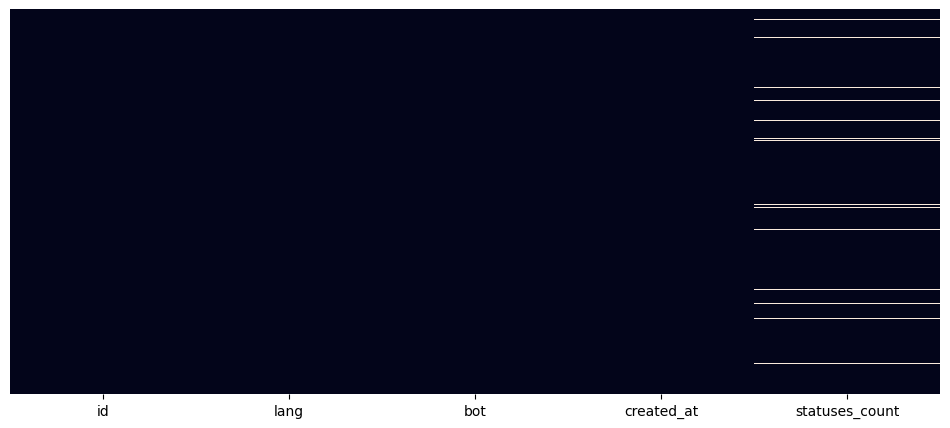

In [250]:
fig, ax = plt.subplots(figsize=(12,5)) 
sn.heatmap(df_users.isnull(), cbar=False, xticklabels=True, ax=ax, yticklabels=False)
plt.show()

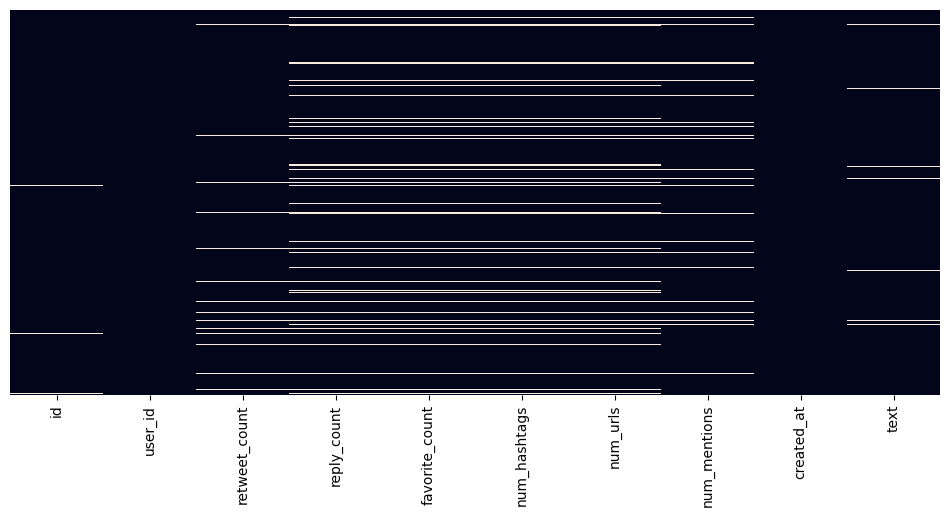

In [251]:
fig, ax = plt.subplots(figsize=(12,5)) 
sn.heatmap(df_tweets.isnull(), cbar=False, xticklabels=True, ax=ax, yticklabels=False)
plt.show()

## Manage NaN before joining tables

Better do before join in order to work only on Users Dataframe which is significantly smaller

As statuses_count in df_users contains only tweet count and not replies, while df_tweets contains also replies, we cannot estimate NaN statuses_count with the number of the users tweets, so we fill those NaNs with median of bot and median of not-bot users

In [252]:
def subsititute_with_median_user(row, bot_median, not_bot_median):
    if pd.isnull(row.statuses_count):
        if row['bot'] == True:
            row.statuses_count = bot_median
        else:
            row.statuses_count = not_bot_median
    return row

In [253]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 0 to 11507
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              11508 non-null  Int64         
 1   lang            11508 non-null  string        
 2   bot             11508 non-null  int64         
 3   created_at      11508 non-null  datetime64[ns]
 4   statuses_count  11109 non-null  Int64         
dtypes: Int64(2), datetime64[ns](1), int64(1), string(1)
memory usage: 561.9 KB


In [254]:
# Statuses_count median for bot and not-bot users
bot_median = df_users.loc[df_users['bot'] == 1].statuses_count.median().astype(np.int64)
not_bot_median = df_users.loc[df_users['bot'] == 0].statuses_count.median().astype(np.int64)
print('bot median statuses_count:', bot_median)
print('not bot median statuses_count:', not_bot_median)

# Apply substitution
df_users = df_users.apply(func=subsititute_with_median_user, axis=1, args=(bot_median, not_bot_median))

bot median statuses_count: 53
not bot median statuses_count: 2041


### Save cleaned user DataFrame

Having cleaned the "lang" attribute, we can convert it and the "bot" attribute to categorical in order to simplify subsequent phases.

In [255]:
df_users.bot = pd.Categorical(df_users.bot)
df_users.lang = pd.Categorical(df_users.lang)

In [256]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 0 to 11507
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              11508 non-null  int64         
 1   lang            11508 non-null  category      
 2   bot             11508 non-null  category      
 3   created_at      11508 non-null  datetime64[ns]
 4   statuses_count  11508 non-null  int64         
dtypes: category(2), datetime64[ns](1), int64(2)
memory usage: 382.9 KB


In [257]:
df_users.to_csv("../dataset/cleaned_users.csv")

## Joining tables
Joining the tables to make sure we work only on the user into the user DB

In [50]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132076 entries, 0 to 136646
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              128264 non-null  Int64         
 1   user_id         132076 non-null  Int64         
 2   retweet_count   126915 non-null  Int64         
 3   reply_count     117760 non-null  Int64         
 4   favorite_count  117765 non-null  Int64         
 5   num_hashtags    117758 non-null  Int64         
 6   num_urls        117764 non-null  Int64         
 7   num_mentions    124178 non-null  Int64         
 8   created_at      132076 non-null  datetime64[ns]
 9   text            127864 non-null  string        
dtypes: Int64(8), datetime64[ns](1), string(1)
memory usage: 12.1 MB


In [51]:
# Join
df_joined = pd.merge(df_tweets, df_users, left_on='user_id', right_on='id', how='inner', suffixes=('', '_user'))

In [52]:
# Drop duplicated user_id column
df_joined.drop(columns=['id_user'], inplace=True)

In [54]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132071 entries, 0 to 132070
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               128259 non-null  Int64         
 1   user_id          132071 non-null  Int64         
 2   retweet_count    126913 non-null  Int64         
 3   reply_count      117760 non-null  Int64         
 4   favorite_count   117765 non-null  Int64         
 5   num_hashtags     117758 non-null  Int64         
 6   num_urls         117764 non-null  Int64         
 7   num_mentions     124175 non-null  Int64         
 8   created_at       132071 non-null  datetime64[ns]
 9   text             127860 non-null  string        
 10  lang             132071 non-null  category      
 11  bot              132071 non-null  bool          
 12  created_at_user  132071 non-null  datetime64[ns]
 13  statuses_count   132071 non-null  int64         
dtypes: Int64(8), bool(1)

## Manage NaN after joining tables

### Tweets Manage NaN
Fill the NaN in the numeric columns

Create Dataframe with count of **valid** (== non-null) numeric tweet attributes grouped by users

In [55]:
df_grouped_by_user_num_valid = df_joined.groupby(['user_id']).count().iloc[:, 1 : 7]

In [56]:
df_grouped_by_user_num_valid.reset_index(inplace=True)
df_grouped_by_user_num_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8381 entries, 0 to 8380
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   user_id         8381 non-null   int64
 1   retweet_count   8381 non-null   int64
 2   reply_count     8381 non-null   int64
 3   favorite_count  8381 non-null   int64
 4   num_hashtags    8381 non-null   int64
 5   num_urls        8381 non-null   int64
 6   num_mentions    8381 non-null   int64
dtypes: int64(7)
memory usage: 458.5 KB


Create Dataframe with **median** value of numeric tweet attributes grouped by users

In [57]:
df_grouped_by_user_median = df_joined.groupby(['user_id']).median().iloc[:, 1 : 7]
df_grouped_by_user_median.apply(cast_int)
df_grouped_by_user_median = df_grouped_by_user_median.astype('Int64')

In [58]:
df_grouped_by_user_median.reset_index(inplace=True)
df_grouped_by_user_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8381 entries, 0 to 8380
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   user_id         8381 non-null   int64
 1   retweet_count   8304 non-null   Int64
 2   reply_count     8154 non-null   Int64
 3   favorite_count  8154 non-null   Int64
 4   num_hashtags    8154 non-null   Int64
 5   num_urls        8154 non-null   Int64
 6   num_mentions    8255 non-null   Int64
dtypes: Int64(6), int64(1)
memory usage: 507.6 KB


Join the two support dataframes since they are both grouped by *user_id*

In [59]:
df_grouped_by_user_joined = pd.merge(df_grouped_by_user_median, df_grouped_by_user_num_valid, left_on='user_id', right_on='user_id', how='inner', suffixes=('_median', '_valid'))

In [60]:
df_grouped_by_user_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8381 entries, 0 to 8380
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   user_id                8381 non-null   int64
 1   retweet_count_median   8304 non-null   Int64
 2   reply_count_median     8154 non-null   Int64
 3   favorite_count_median  8154 non-null   Int64
 4   num_hashtags_median    8154 non-null   Int64
 5   num_urls_median        8154 non-null   Int64
 6   num_mentions_median    8255 non-null   Int64
 7   retweet_count_valid    8381 non-null   int64
 8   reply_count_valid      8381 non-null   int64
 9   favorite_count_valid   8381 non-null   int64
 10  num_hashtags_valid     8381 non-null   int64
 11  num_urls_valid         8381 non-null   int64
 12  num_mentions_valid     8381 non-null   int64
dtypes: Int64(6), int64(7)
memory usage: 965.8 KB


Add 'bot' column for each user with a merge with users DataFrame

In [61]:
df_grouped_by_user_joined = pd.merge(df_grouped_by_user_joined, df_users[['id', 'bot']], left_on='user_id', right_on='id', how='inner', suffixes=('_', '_user'))
df_grouped_by_user_joined.drop(columns=['id'], inplace=True)


In [62]:
df_grouped_by_user_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8381 entries, 0 to 8380
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   user_id                8381 non-null   int64
 1   retweet_count_median   8304 non-null   Int64
 2   reply_count_median     8154 non-null   Int64
 3   favorite_count_median  8154 non-null   Int64
 4   num_hashtags_median    8154 non-null   Int64
 5   num_urls_median        8154 non-null   Int64
 6   num_mentions_median    8255 non-null   Int64
 7   retweet_count_valid    8381 non-null   int64
 8   reply_count_valid      8381 non-null   int64
 9   favorite_count_valid   8381 non-null   int64
 10  num_hashtags_valid     8381 non-null   int64
 11  num_urls_valid         8381 non-null   int64
 12  num_mentions_valid     8381 non-null   int64
 13  bot                    8381 non-null   bool 
dtypes: Int64(6), bool(1), int64(7)
memory usage: 974.0 KB


Define a function that for each attribute and for each user define the median value to use in case null substitution is needed.

If for the user has less than *min_valid_user_values* tweets with a valid attribute, we use bot/not-bot median for that attribute and user instead of user attribute median.

In [63]:
def use_bot_or_user_median (row, col_name, bot_median, not_bot_median, min_valid_user_values):
    col_median = col_name + '_median'
    col_num_val = col_name + '_valid'

    if row[col_num_val] < min_valid_user_values or pd.isna(row[col_num_val]):
        if row['bot'] == True:
            row[col_median] = bot_median
        else:
            row[col_median] = not_bot_median
    return row
    

In [64]:
# Minimum value of other tweets with not-NaN feature
min_valid_user_values = 20 

for col_name in df_joined.iloc[:, 2 : 8]:
    # Calculate median on the feature for bots and not-bots
    bot_median = df_joined.loc[df_joined['bot'] == 1][col_name].median().astype(np.int64)
    not_bot_median = df_joined.loc[df_joined['bot'] == 0][col_name].median().astype(np.int64)
    print('bot median {}:'.format(col_name), bot_median)
    print('not bot median {}:'.format(col_name), not_bot_median)

    # Substittute in the support DataFrame the median for each user
    df_grouped_by_user_joined = df_grouped_by_user_joined.apply(
        func=use_bot_or_user_median, axis=1, args=(
            col_name, bot_median, not_bot_median, min_valid_user_values))

bot median retweet_count: 0
not bot median retweet_count: 0
bot median reply_count: 0
not bot median reply_count: 0
bot median favorite_count: 0
not bot median favorite_count: 0
bot median num_hashtags: 0
not bot median num_hashtags: 0
bot median num_urls: 0
not bot median num_urls: 0
bot median num_mentions: 0
not bot median num_mentions: 1


Drop *_num_valid* and 'bot' columns in support DataFrame

In [65]:
df_grouped_by_user_joined = df_grouped_by_user_joined.iloc[: , :-7]

In [66]:
df_grouped_by_user_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8381 entries, 0 to 8380
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   user_id                8381 non-null   Int64
 1   retweet_count_median   8381 non-null   Int64
 2   reply_count_median     8381 non-null   Int64
 3   favorite_count_median  8381 non-null   Int64
 4   num_hashtags_median    8381 non-null   Int64
 5   num_urls_median        8381 non-null   Int64
 6   num_mentions_median    8381 non-null   Int64
dtypes: Int64(7)
memory usage: 581.1 KB


Convert support DataFrame of medians into a **nested dictionary** in order to optimize access speed.

Each key of the dict is the **column name** (*col_name_median*), each value is a subdictionary.
Each subdictionary contains a key for each **'user_id'** with the eventual median to subsititute for that user in that column.

In [67]:
median_nested_dict = df_grouped_by_user_joined.set_index('user_id').to_dict()

In [68]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132071 entries, 0 to 132070
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               128259 non-null  Int64         
 1   user_id          132071 non-null  Int64         
 2   retweet_count    126913 non-null  Int64         
 3   reply_count      117760 non-null  Int64         
 4   favorite_count   117765 non-null  Int64         
 5   num_hashtags     117758 non-null  Int64         
 6   num_urls         117764 non-null  Int64         
 7   num_mentions     124175 non-null  Int64         
 8   created_at       132071 non-null  datetime64[ns]
 9   text             127860 non-null  string        
 10  lang             132071 non-null  category      
 11  bot              132071 non-null  bool          
 12  created_at_user  132071 non-null  datetime64[ns]
 13  statuses_count   132071 non-null  int64         
dtypes: Int64(8), bool(1)

Substitute for each numeric tweet attributr in the *df_joined* DataFrame NaN values with values from median nested dictionary.

In [69]:
# Minimum value of other tweets with not-NaN feature
min_valid_user_values = 20 

col_idx = 0

# Set 'user_id' as index of each tweet row in order to use fillna with the dict having
# keys being 'user_id'
df_joined.set_index('user_id', inplace=True)

for col_name in df_joined.iloc[:, 1 : 7]:
    print('Doing:',  col_name)
    col_median = col_name + '_median'

    # Fill each column with the subdictionary relative to that column
    df_joined[col_name].fillna(median_nested_dict[col_median], inplace=True)

df_joined.reset_index(inplace=True)


Doing: retweet_count
Doing: reply_count
Doing: favorite_count
Doing: num_hashtags
Doing: num_urls
Doing: num_mentions


Substitute all NaN 'text' strings with "", the void string

In [70]:
df_joined.text.fillna(value="", inplace=True)

In [71]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132071 entries, 0 to 132070
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   user_id          132071 non-null  int64         
 1   id               128259 non-null  Int64         
 2   retweet_count    132071 non-null  Int64         
 3   reply_count      132071 non-null  Int64         
 4   favorite_count   132071 non-null  Int64         
 5   num_hashtags     132071 non-null  Int64         
 6   num_urls         132071 non-null  Int64         
 7   num_mentions     132071 non-null  Int64         
 8   created_at       132071 non-null  datetime64[ns]
 9   text             132071 non-null  string        
 10  lang             132071 non-null  category      
 11  bot              132071 non-null  bool          
 12  created_at_user  132071 non-null  datetime64[ns]
 13  statuses_count   132071 non-null  int64         
dtypes: Int64(7), bool(1)

In [72]:
df_joined.head()

,user_id,id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text,lang,bot,created_at_user,statuses_count
0,567430901,528578456452612096,0,0,0,0,0,0,2019-11-03 16:04:59,"La sera, a letto.Lui:- FarÃ² di te la donna pi...",it,True,2017-05-02 18:18:01,2223
1,567430901,340666644739284992,0,0,0,0,0,0,2018-06-03 03:10:32,"Non dimentichiamoci, per caritÃ , che il cane ...",it,True,2017-05-02 18:18:01,2223
2,567430901,515125748949348416,1,0,0,0,0,0,2019-09-27 13:08:43,"ChissÃ , prima degli smartphone, a chi sorride...",it,True,2017-05-02 18:18:01,2223
3,567430901,353446566364844032,0,0,0,0,0,0,2018-07-08 09:33:22,"""Una cosa bella Ã¨ una gioia per sempre; la su...",it,True,2017-05-02 18:18:01,2223
4,567430901,369003095553884160,0,0,0,0,0,0,2018-08-20 07:49:28,Ho appena defollowato una mia mica su facebook,it,True,2017-05-02 18:18:01,2223


### Save cleaned joined matrix

In [73]:
df_joined.to_csv("../dataset/cleaned_joined_tweets.csv")

## Correlation matrix
Now we see the correlation matrix to spot if there are any significant correlations between the attributes in the sample:

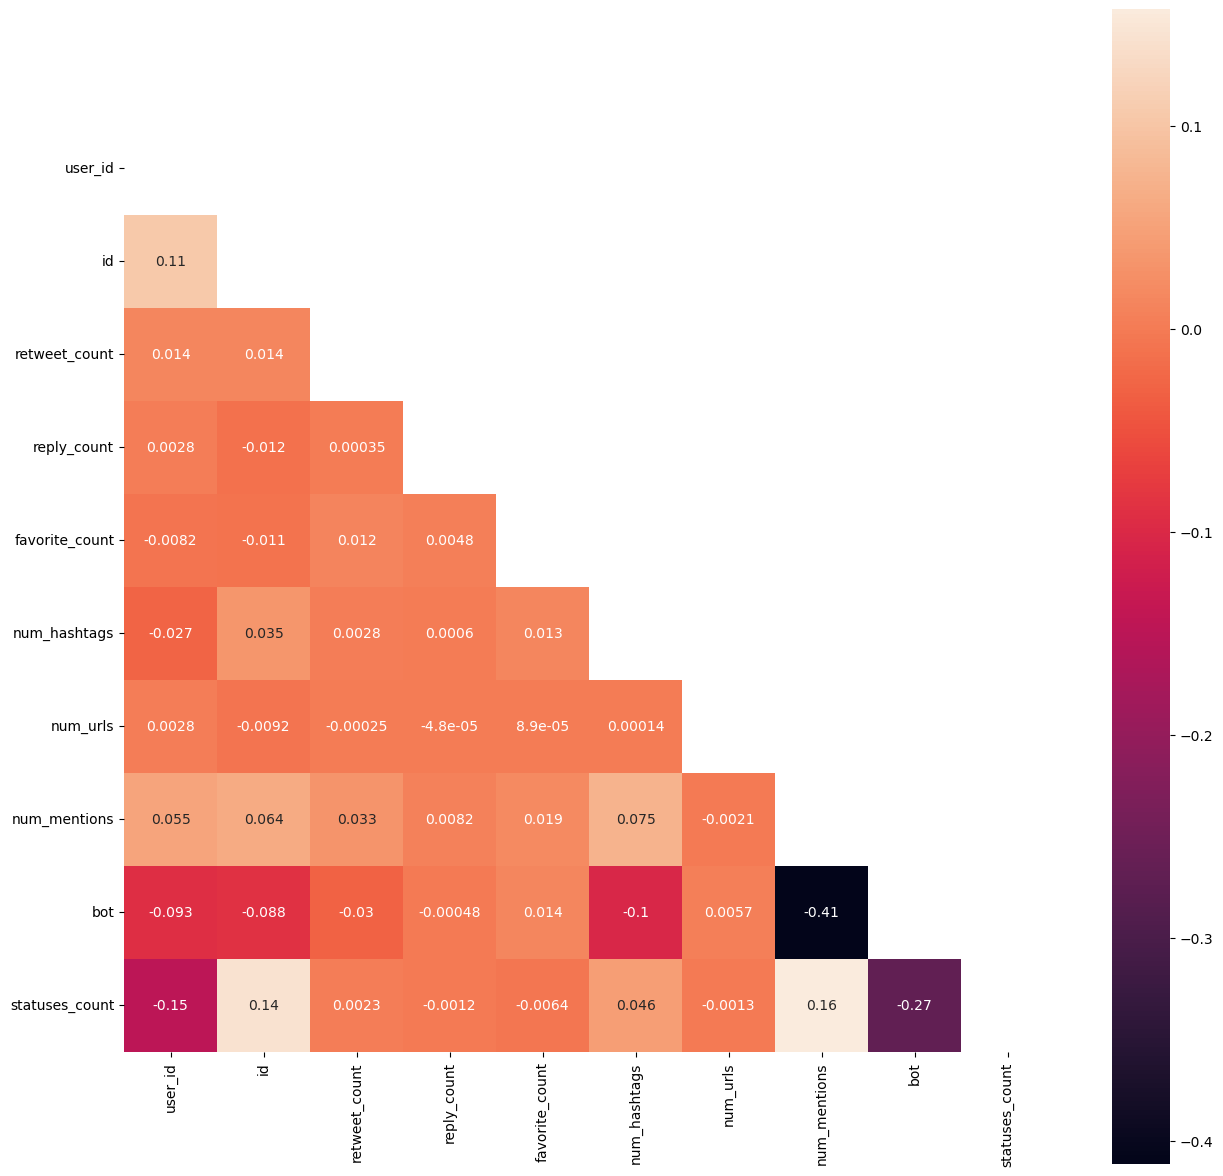

In [74]:
corr_matrix = df_joined.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask
sn.heatmap(corr_matrix, annot=True, mask=mask, square=True)

plt.show()

We found no attribute with high enough correlation to be excluded

See how many tweets are generated from bot users and how many from not bot users with a pie pchart

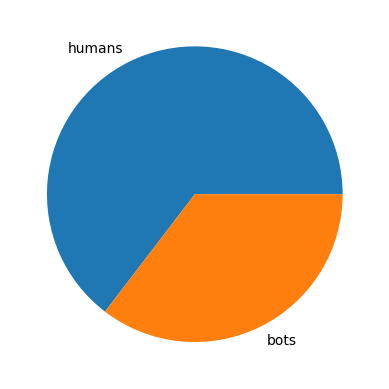

In [75]:
label= ['humans', 'bots']
plt.pie(df_joined['bot'].value_counts(), labels=label)
plt.show()

## PCA

Select numeric attributes from tweets

In [76]:
df_numeric_tweets_attr = df_joined.iloc[: , 2:8].copy()
df_numeric_tweets_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132071 entries, 0 to 132070
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   retweet_count   132071 non-null  Int64
 1   reply_count     132071 non-null  Int64
 2   favorite_count  132071 non-null  Int64
 3   num_hashtags    132071 non-null  Int64
 4   num_urls        132071 non-null  Int64
 5   num_mentions    132071 non-null  Int64
dtypes: Int64(6)
memory usage: 6.8 MB


Show 2d PCA

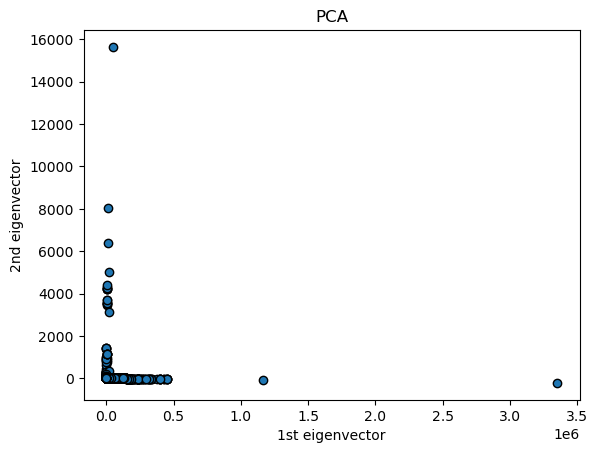

In [77]:
X_pca = PCA(n_components=2).fit_transform(df_numeric_tweets_attr)
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap=plt.cm.Set1, edgecolor='k')
plt.title("PCA")
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")
#plt.xscale('log')
#plt.yscale('log')
plt.show()

PCA with 3 dimensions

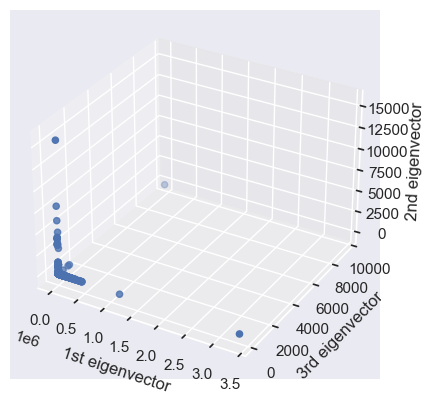

In [78]:
X_pca = PCA(n_components=3).fit_transform(df_numeric_tweets_attr)
sn.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = X_pca[:, 0]
y = X_pca[:, 2]
z = X_pca[:, 1]

ax.set_xlabel("1st eigenvector")
ax.set_ylabel("3rd eigenvector")
ax.set_zlabel("2nd eigenvector")

ax.scatter(x, y, z)

plt.show()